In [ ]:
import pandas as pd

# Specify the file path
file_path = "/content/ec2_cpu_utilization_5f5533.csv"

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/ec2_cpu_utilization_5f5533.csv')

# Display the loaded data
print(data.head(200))
print(data.tail(200))

               timestamp   value
0    2014-02-14 14:27:00  51.846
1    2014-02-14 14:32:00  44.508
2    2014-02-14 14:37:00  41.244
3    2014-02-14 14:42:00  48.568
4    2014-02-14 14:47:00  46.714
..                   ...     ...
195  2014-02-15 06:42:00  44.232
196  2014-02-15 06:47:00  48.236
197  2014-02-15 06:52:00  41.080
198  2014-02-15 06:57:00  53.920
199  2014-02-15 07:02:00  46.220

[200 rows x 2 columns]
                timestamp   value
3832  2014-02-27 21:47:00  37.654
3833  2014-02-27 21:52:00  37.182
3834  2014-02-27 21:57:00  41.052
3835  2014-02-27 22:02:00  37.558
3836  2014-02-27 22:07:00  40.118
...                   ...     ...
4027  2014-02-28 14:02:00  38.474
4028  2014-02-28 14:07:00  40.352
4029  2014-02-28 14:12:00  37.912
4030  2014-02-28 14:17:00  38.458
4031  2014-02-28 14:22:00  37.718

[200 rows x 2 columns]


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = [
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_cpu_utilization_24ae8d.csv",
    "/content/ec2_cpu_utilization_53ea38.csv",
    "/content/ec2_cpu_utilization_825cc2.csv",
    "/content/ec2_cpu_utilization_ac20cd.csv",
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_disk_write_bytes_1ef3de.csv",
    "/content/ec2_disk_write_bytes_c0d644.csv",
    "/content/ec2_network_in_5abac7.csv",
    "/content/ec2_network_in_257a54.csv",
    "/content/elb_request_count_8c0756.csv",
    "/content/grok_asg_anomaly.csv",
    "/content/iio_us-east-1_i-a2eb1cd9_NetworkIn.csv",
    "/content/rds_cpu_utilization_cc0c53.csv"
]

# Load each CSV file into a DataFrame and merge them
dfs = [pd.read_csv(file) for file in file_paths]
merged_data = pd.concat(dfs)

# Assuming each CSV file has a timestamp column, ensure it is recognized as datetime
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

# Optionally, you can sort the DataFrame by timestamp
merged_data = merged_data.sort_values(by='timestamp')

# Display the merged data
print(merged_data.tail(100))


               timestamp       value
3994 2014-04-23 21:34:00      91.000
3995 2014-04-23 21:39:00      83.000
4001 2014-04-23 21:39:00      93.374
4001 2014-04-23 21:39:00  277197.000
4002 2014-04-23 21:44:00      94.376
...                  ...         ...
4027 2014-04-24 00:19:00      32.000
4028 2014-04-24 00:24:00      57.000
4029 2014-04-24 00:29:00      10.000
4030 2014-04-24 00:34:00      18.000
4031 2014-04-24 00:39:00      60.000

[100 rows x 2 columns]


In [ ]:
# Summary statistics
summary_stats = merged_data.describe()
print("Summary Statistics:")
print(summary_stats)

# Null value checking
null_values = merged_data.isnull().sum()
print("\nNull Value Checking:")
print(null_values)


Summary Statistics:
              value
count  5.564400e+04
mean   1.969865e+06
std    2.495725e+07
min    0.000000e+00
25%    6.800000e-02
50%    6.665000e+00
75%    7.680000e+01
max    8.639640e+08

Null Value Checking:
timestamp    0
value        0
dtype: int64


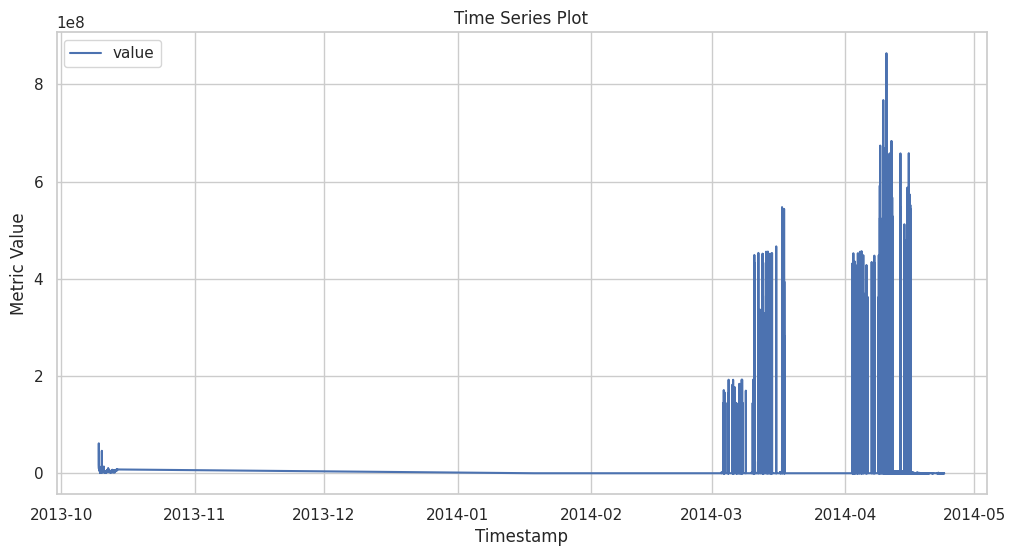

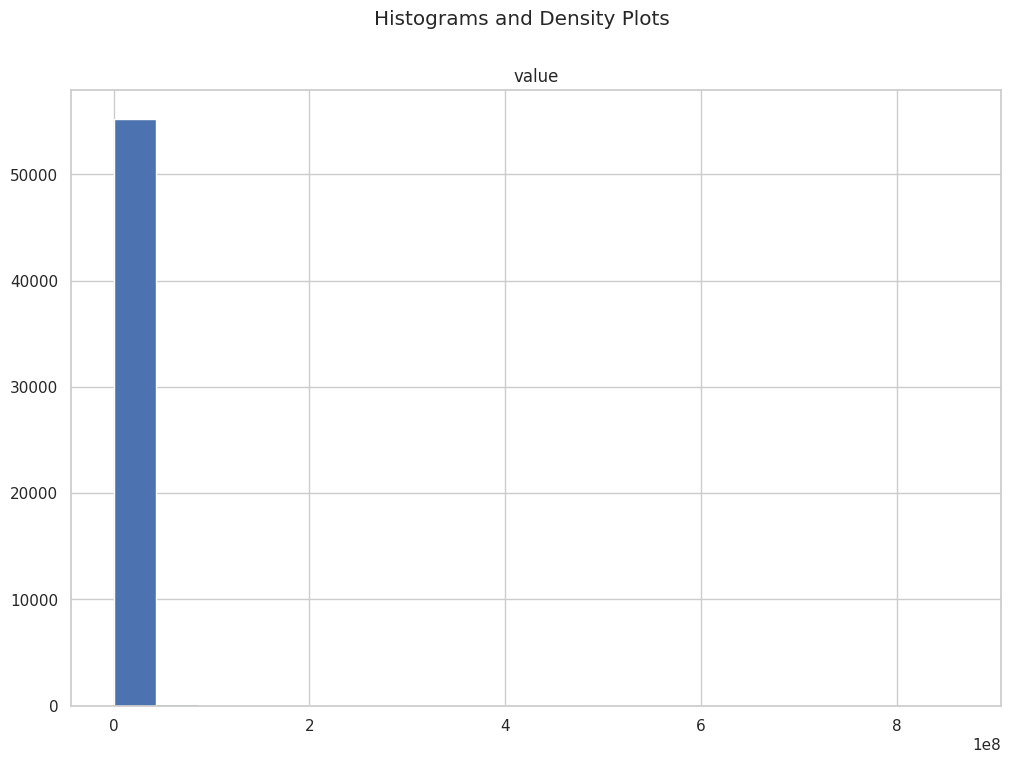

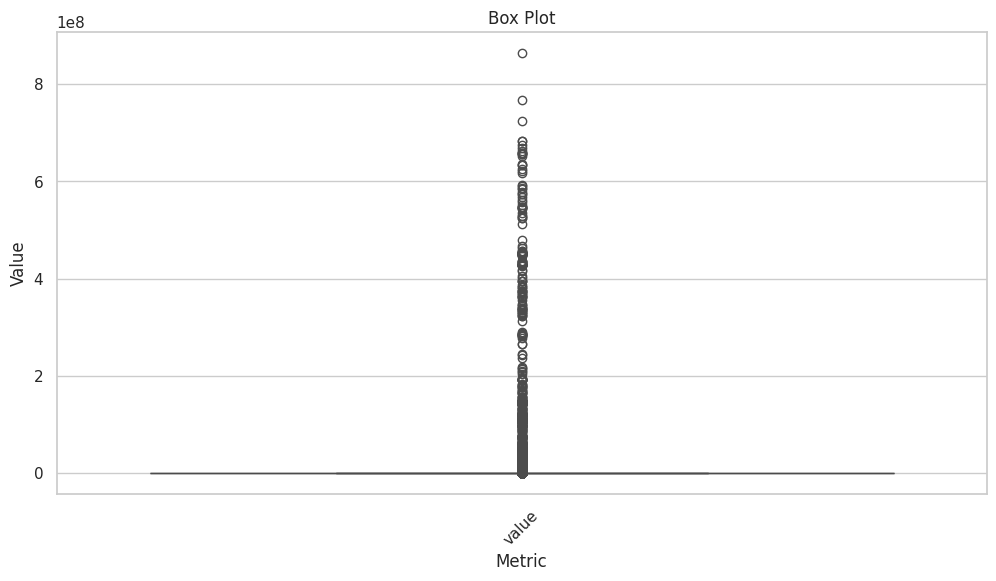

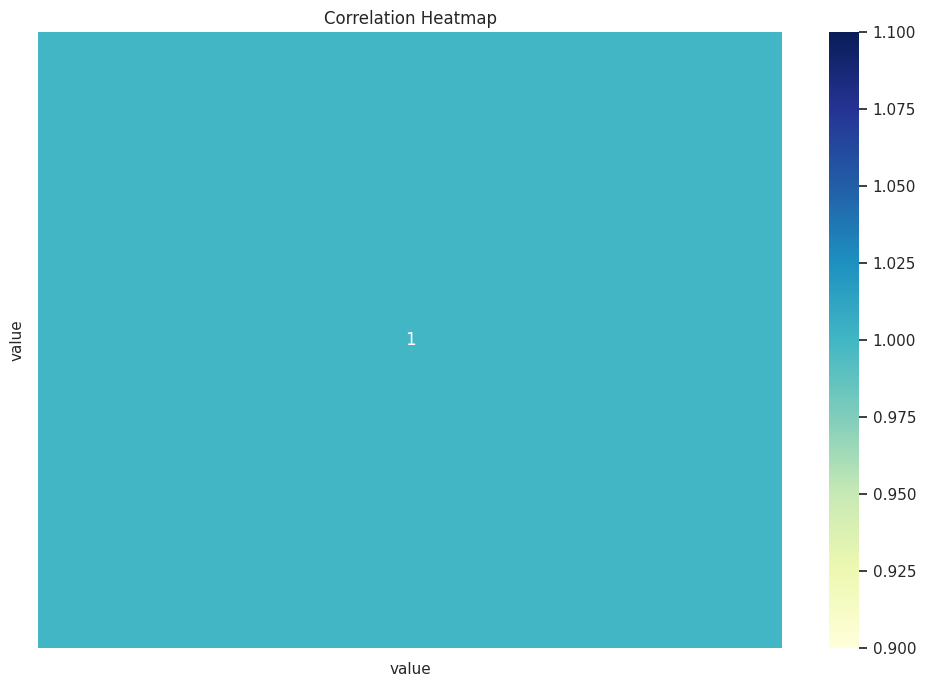

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Time Series Plot
plt.figure(figsize=(12, 6))
for column in merged_data.columns[1:]:  # Exclude timestamp column
    plt.plot(merged_data['timestamp'], merged_data[column], label=column)
plt.title('Time Series Plot')
plt.xlabel('Timestamp')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Histograms and Density Plots
merged_data.drop(columns=['timestamp']).hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms and Density Plots')
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data.drop(columns=['timestamp']))
plt.title('Box Plot')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.drop(columns=['timestamp']).corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.85      0.89       367
           1       0.99      1.00      1.00     10762

    accuracy                           0.99     11129
   macro avg       0.96      0.93      0.94     11129
weighted avg       0.99      0.99      0.99     11129



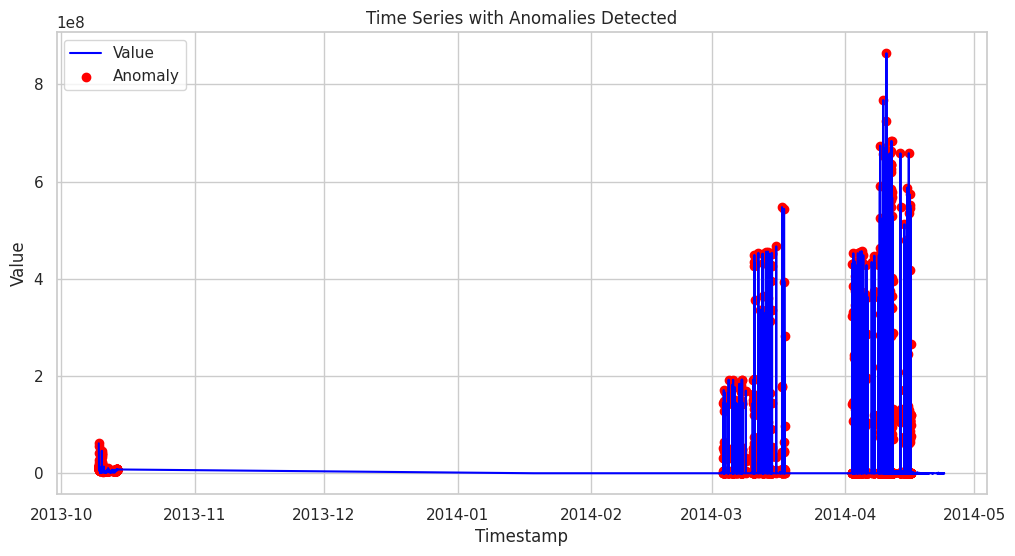

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame containing merged CSV data

# Feature Engineering
# Here, we'll use lag features as an example. You can customize this based on your domain knowledge.
merged_data['value_lag1'] = merged_data['value'].shift(1)  # Lag 1 feature
merged_data['value_lag2'] = merged_data['value'].shift(2)  # Lag 2 feature

# Drop rows with NaN resulting from shifting
merged_data.dropna(inplace=True)

# Anomaly Detection
# We'll use Isolation Forest as a simple anomaly detection technique
isolation_forest = IsolationForest(contamination=0.03)  # Adjust contamination based on anomaly proportion

isolation_forest.fit(merged_data[['value', 'value_lag1', 'value_lag2']])

# Predict anomalies
anomaly_labels = isolation_forest.predict(merged_data[['value', 'value_lag1', 'value_lag2']])
merged_data['anomaly'] = anomaly_labels

# Machine Learning Model
X = merged_data[['value_lag1', 'value_lag2']]  # Features for the model
y = anomaly_labels  # Anomaly labels as target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict using the trained model
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting anomalies
plt.figure(figsize=(12, 6))
plt.plot(merged_data['timestamp'], merged_data['value'], label='Value', color='blue')
anomalies = merged_data[merged_data['anomaly'] == -1]
plt.scatter(anomalies['timestamp'], anomalies['value'], label='Anomaly', color='red', marker='o')
plt.title('Time Series with Anomalies Detected')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


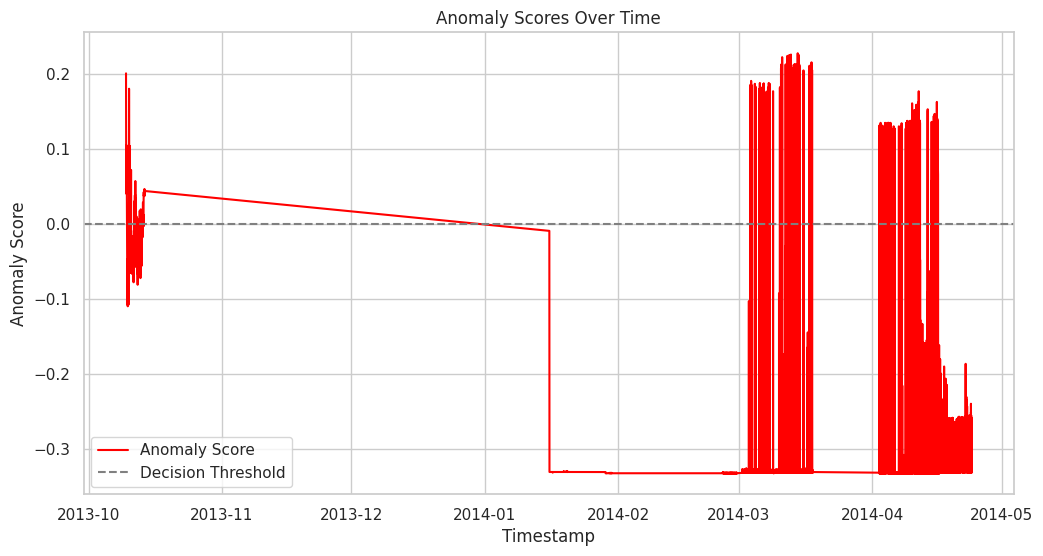

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame containing merged CSV data

# Feature Engineering
# Here, we'll use lag features as an example. You can customize this based on your domain knowledge.
merged_data['value_lag1'] = merged_data['value'].shift(1)  # Lag 1 feature
merged_data['value_lag2'] = merged_data['value'].shift(2)  # Lag 2 feature

# Drop rows with NaN resulting from shifting
merged_data.dropna(inplace=True)

# Anomaly Detection
# We'll use Isolation Forest as a simple anomaly detection technique
isolation_forest = IsolationForest(contamination=0.03)  # Adjust contamination based on anomaly proportion

# Fit Isolation Forest model
isolation_forest.fit(merged_data[['value', 'value_lag1', 'value_lag2']])

# Predict anomalies (-1 for anomalies, 1 for normal instances)
anomaly_labels = isolation_forest.predict(merged_data[['value', 'value_lag1', 'value_lag2']])

# Convert anomaly labels to anomaly scores
anomaly_scores = - isolation_forest.decision_function(merged_data[['value', 'value_lag1', 'value_lag2']])

# Plotting anomaly scores
plt.figure(figsize=(12, 6))
plt.plot(merged_data['timestamp'], anomaly_scores, label='Anomaly Score', color='red')
plt.axhline(y=0, color='gray', linestyle='--', label='Decision Threshold')
plt.title('Anomaly Scores Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()


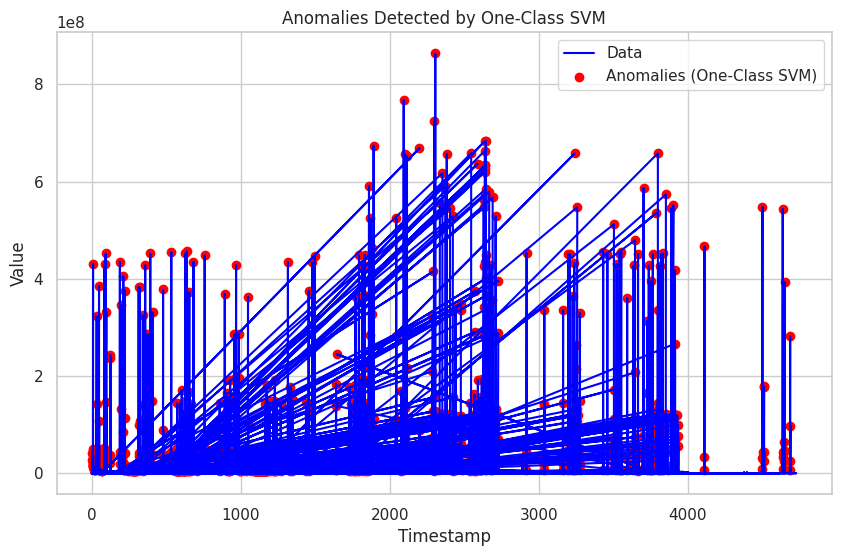

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM

# Load your data and preprocess it as needed
# Assuming you have loaded your data into merged_data DataFrame

# Prepare data
data = merged_data[['value']].values

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Train One-Class SVM
model_ocsvm = OneClassSVM(nu=0.05)  # Adjust nu parameter as needed
model_ocsvm.fit(scaled_data)

# Predict anomalies using One-Class SVM
anomalies_ocsvm = model_ocsvm.predict(scaled_data)
anomalies_ocsvm = pd.DataFrame({'timestamp': merged_data.index, 'value': merged_data['value'], 'anomaly_score': anomalies_ocsvm})
anomalies_ocsvm = anomalies_ocsvm[anomalies_ocsvm['anomaly_score'] == -1]

# Plot anomalies detected by One-Class SVM
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['value'], color='blue', label='Data')
plt.scatter(anomalies_ocsvm.index, anomalies_ocsvm['value'], color='red', label='Anomalies (One-Class SVM)')
plt.title('Anomalies Detected by One-Class SVM')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()


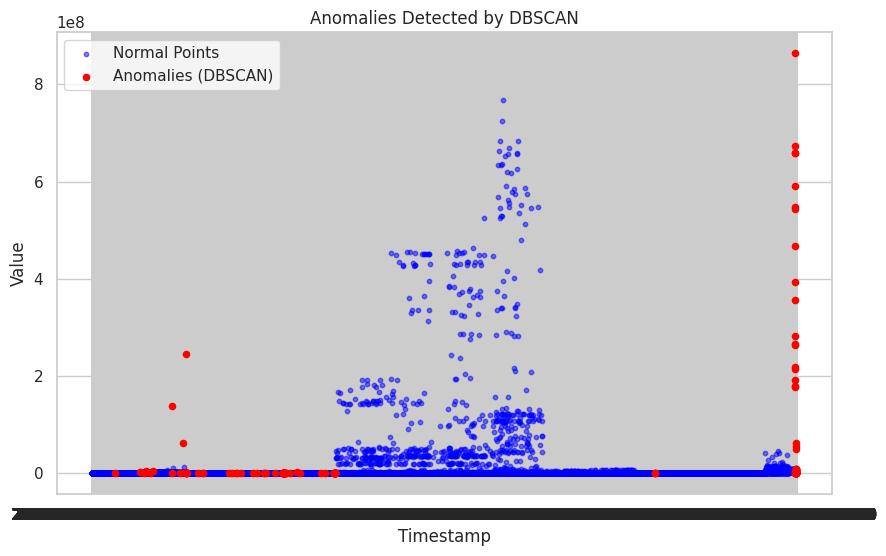

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# Function to process data chunk using DBSCAN
def process_chunk(chunk):
    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(chunk[['value']].values)

    # Define DBSCAN parameters
    eps = 0.1  # Adjust epsilon as needed
    min_samples = 5  # Adjust min_samples as needed

    # Fit DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(scaled_data)

    # Extract anomaly indices
    anomaly_mask = dbscan.labels_ == -1
    anomalies = chunk[anomaly_mask]
    normal_points = chunk[~anomaly_mask]

    return anomalies, normal_points

# List of CSV file paths
file_paths = [
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_cpu_utilization_24ae8d.csv",
    "/content/ec2_cpu_utilization_53ea38.csv",
    "/content/ec2_cpu_utilization_825cc2.csv",
    "/content/ec2_cpu_utilization_ac20cd.csv",
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_disk_write_bytes_1ef3de.csv",
    "/content/ec2_disk_write_bytes_c0d644.csv",
    "/content/ec2_network_in_5abac7.csv",
    "/content/ec2_network_in_257a54.csv",
    "/content/elb_request_count_8c0756.csv",
    "/content/grok_asg_anomaly.csv",
    "/content/iio_us-east-1_i-a2eb1cd9_NetworkIn.csv",
    "/content/rds_cpu_utilization_cc0c53.csv"
]

# Sample size for visualization
sample_size = 1000  # Adjust sample size as needed

# Process data in chunks
chunk_size = 1000  # Adjust chunk size as needed
anomalies = []
normal_points = []

for file_path in file_paths:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        anomalies_chunk, normal_chunk = process_chunk(chunk)
        anomalies.append(anomalies_chunk.sample(min(sample_size, len(anomalies_chunk))))
        normal_points.append(normal_chunk.sample(min(sample_size, len(normal_chunk))))

# Concatenate anomalies detected in all chunks
anomalies_dbscan = pd.concat(anomalies)
normal_points_dbscan = pd.concat(normal_points)

# Visualize anomalies and normal points
plt.figure(figsize=(10, 6))
plt.scatter(normal_points_dbscan['timestamp'], normal_points_dbscan['value'], color='blue', s=10, alpha=0.5, label='Normal Points')
plt.scatter(anomalies_dbscan['timestamp'], anomalies_dbscan['value'], color='red', s=20, label='Anomalies (DBSCAN)')
plt.title('Anomalies Detected by DBSCAN')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()
